# Import All Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and Clean Data

In [4]:
df = pd.read_csv("googl_data_2020_2025.csv")
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [5]:
df.shape

(1260, 7)

In [6]:
df.size

8820

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [8]:
df.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,1260,1259,1259,1259,1259,1259,1259
unique,1260,1240,1236,1224,1229,1221,1252
top,Ticker,105.5872421,105.9700012,142.0800018,70.13400269,138.5,22288000
freq,1,3,3,3,2,3,3


In [9]:
df_cleaned = df.iloc[2:].copy()
df_cleaned.rename(columns={'Price': 'Date'}, inplace=True)

numeric_cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned.dropna(inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

In [10]:
df.isnull().sum()

Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64

In [11]:
df.dropna(inplace=True)

# Feature Engineering

In [20]:
# Calculate Moving Averages before dropping rows
df_cleaned['MA7'] = df_cleaned['Close'].rolling(window=7).mean()
df_cleaned['MA21'] = df_cleaned['Close'].rolling(window=21).mean()
df_cleaned['Price_Range'] = df_cleaned['High'] - df_cleaned['Low']

# Drop rows with NaNs generated from rolling calculations
df_cleaned.dropna(inplace=True)

In [28]:
# extract Year and Month after nulls are gone
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# EDA Visualizations

In [13]:
sns.set(style='whitegrid')

## Line Plot – Closing Price

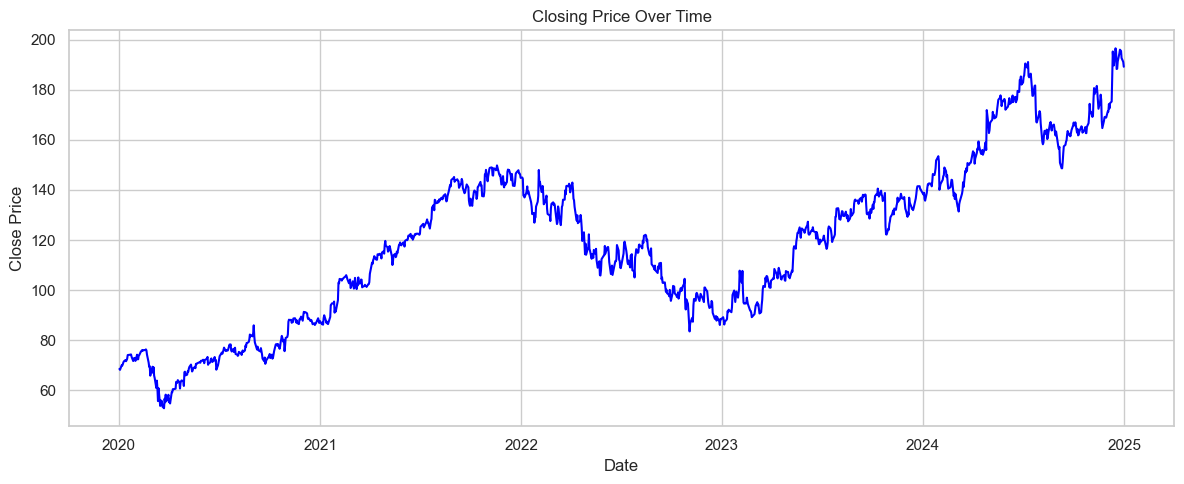

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()


## Line Plot – Volume

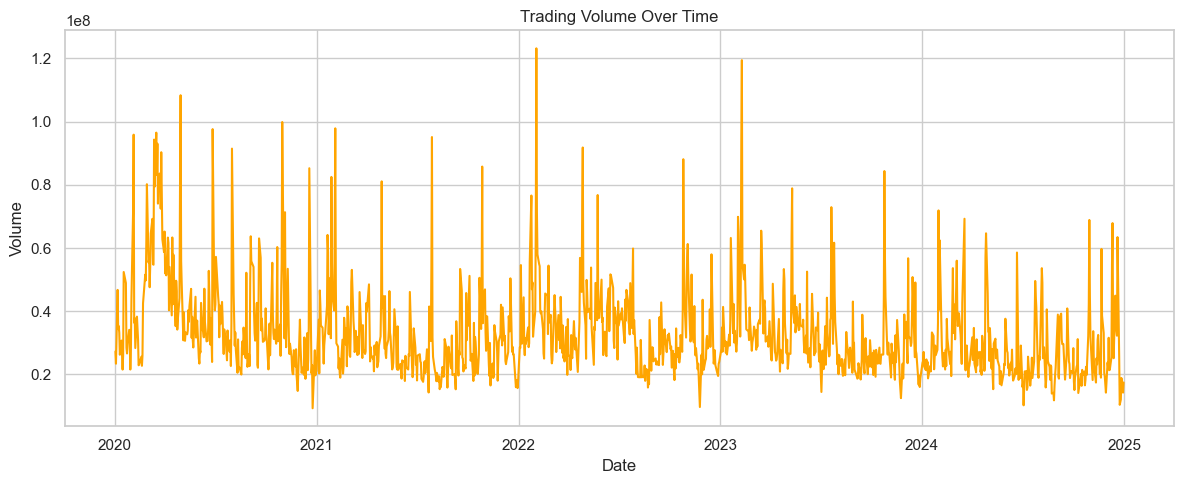

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(df_cleaned['Date'], df_cleaned['Volume'], color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

## Line Plot - Moving Avg

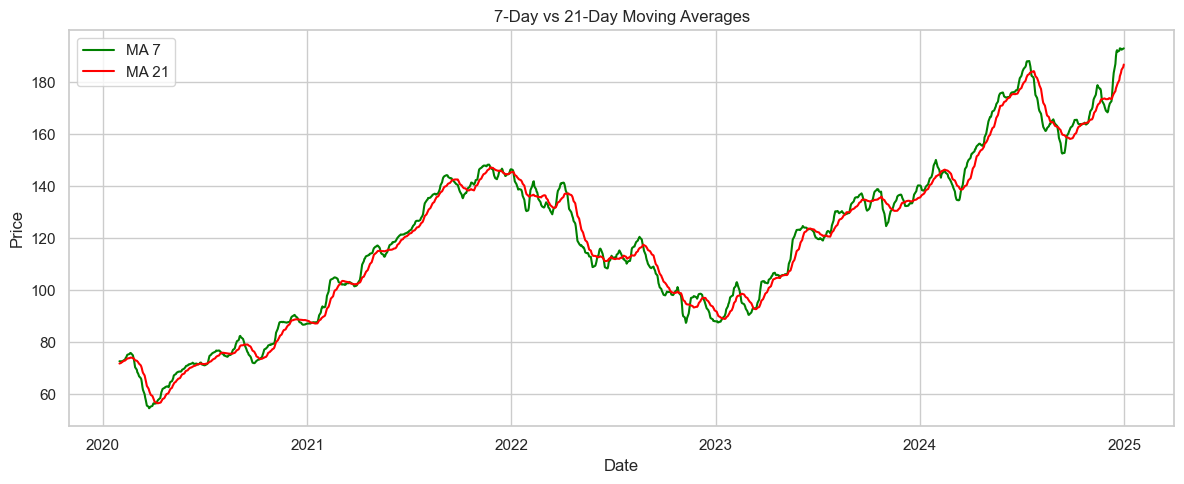

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df_cleaned['Date'], df_cleaned['MA7'], label='MA 7', color='green')
plt.plot(df_cleaned['Date'], df_cleaned['MA21'], label='MA 21', color='red')
plt.title('7-Day vs 21-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


## Bar Chart

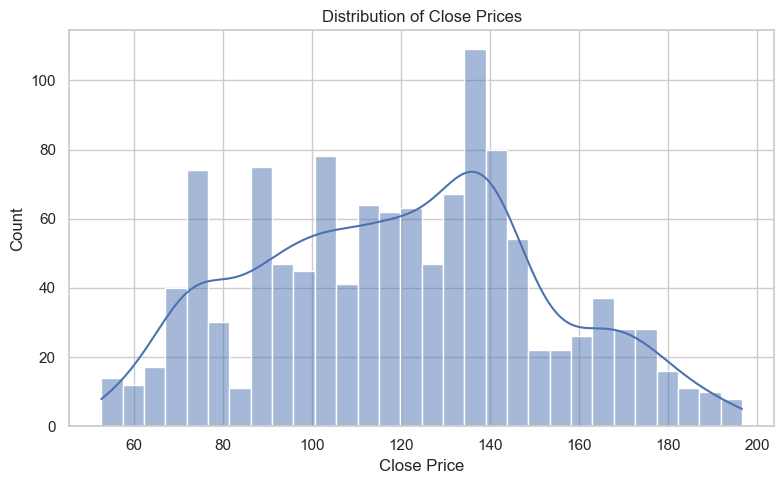

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Close'], kde=True, bins=30)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.tight_layout()
plt.show()

## Boxplot 

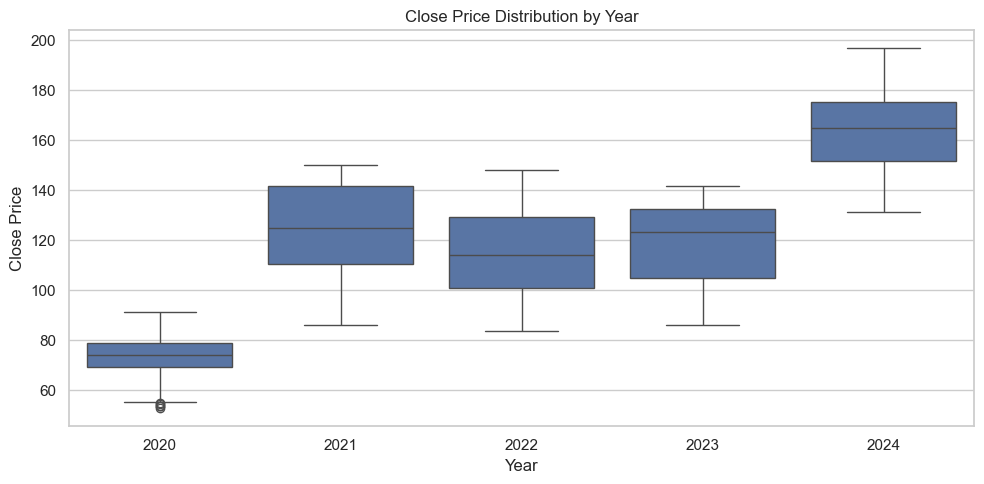

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['Year'], y=df_cleaned['Close'])
plt.title('Close Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

## Scatter Plot

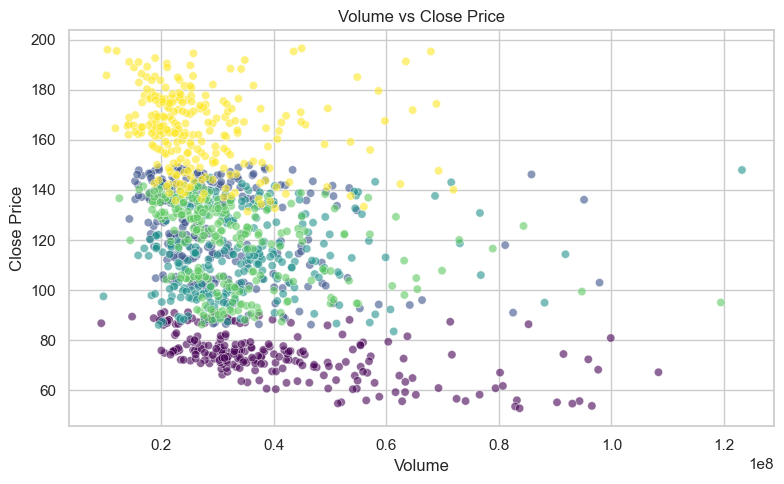

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='Volume', y='Close', alpha=0.6, hue='Year', palette='viridis', legend=False)
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

## Line Plot

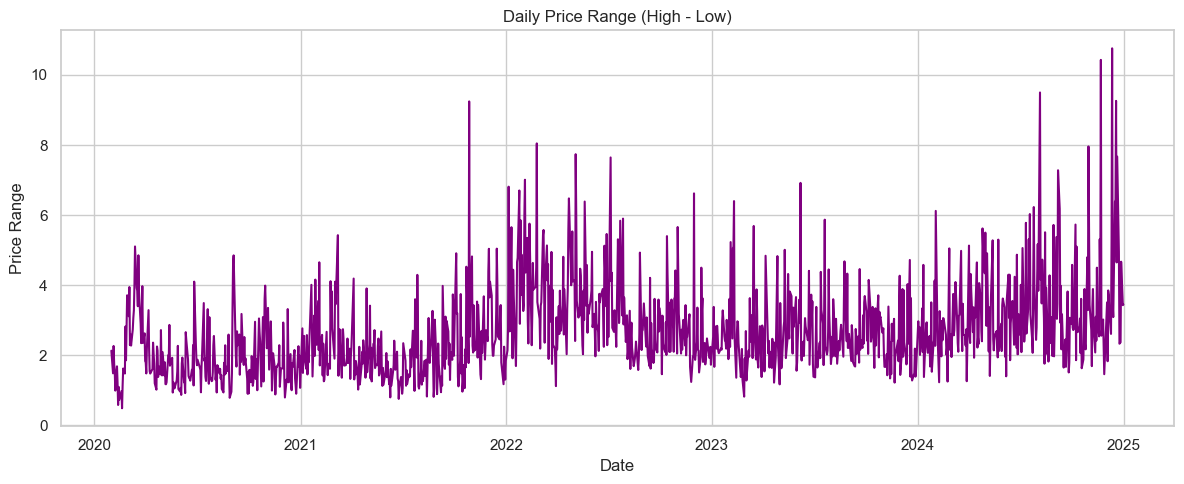

In [36]:
plt.figure(figsize=(12, 5))
plt.plot(df_cleaned['Date'], df_cleaned['Price_Range'], color='purple')
plt.title('Daily Price Range (High - Low)')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.tight_layout()
plt.show()

## Line Plot 

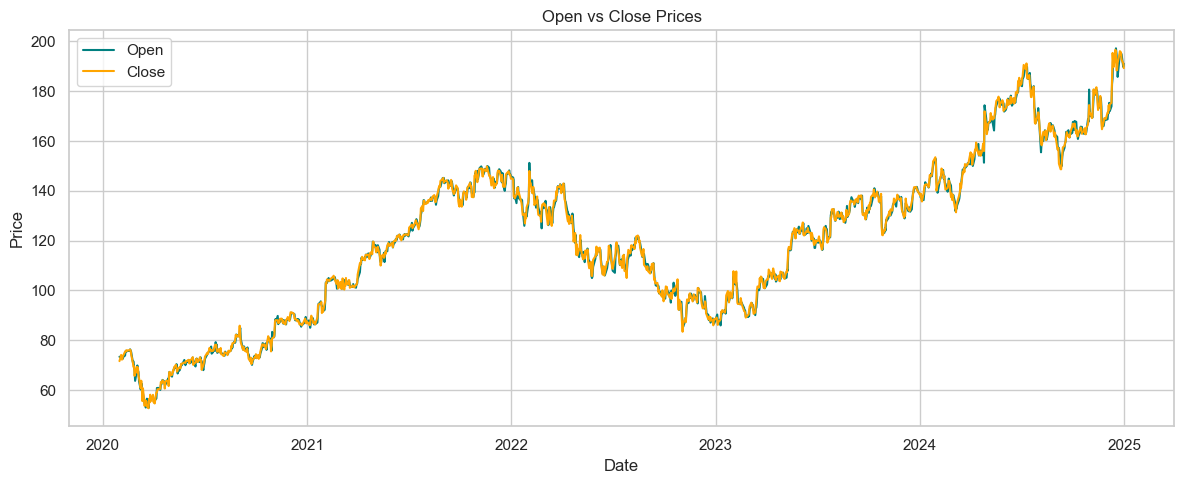

In [38]:
plt.figure(figsize=(12, 5))
plt.plot(df_cleaned['Date'], df_cleaned['Open'], label='Open', color='teal')
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Close', color='orange')
plt.title('Open vs Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

## Monthly Average Close Price

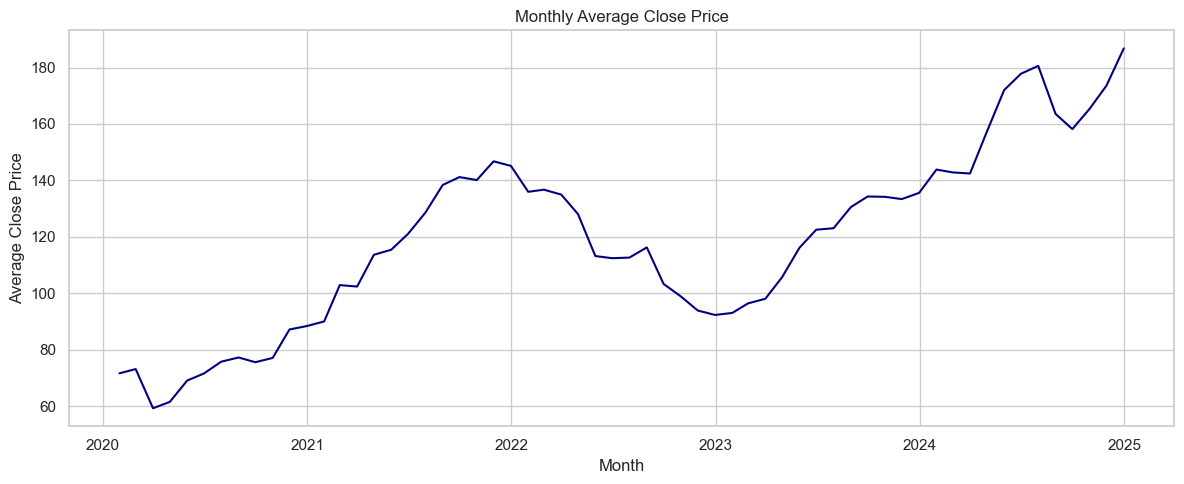

In [40]:
monthly_avg = df_cleaned.resample('M', on='Date').mean(numeric_only=True)
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg.index, monthly_avg['Close'], color='navy')
plt.title('Monthly Average Close Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.tight_layout()
plt.show()

# Train/Test Split

In [43]:

features = ['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21']
target = 'Close'

X = df_cleaned[features].dropna()
y = df_cleaned[target].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Machine Learning Model

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 1.1543785279554635
R² Score: 0.9986119178376526


# Insights

- The dataset had minimal missing values, which were safely removed without impacting trend analysis.

- Closing prices showed a strong upward trend over the five-year period, reflecting consistent stock growth.

- 7-day and 21-day moving averages provided clear signals of short- and long-term market trends.

- High correlation between Open, High, Low, and Close prices (correlation > 0.98) suggests consistent price behavior.

- Volume spikes occurred independently of price movement, indicating weak correlation between volume and price.

- Close price distribution was slightly right-skewed, meaning most prices were below the average but had high-value outliers.

- Boxplots by year showed that volatility was highest in 2021 and 2024.

- Daily price range highlighted market turbulence in specific time windows, useful for identifying high-risk periods.

- Open and Close prices remained closely aligned, signaling market stability with limited intraday surprises.

- Monthly average Close price demonstrated consistent long-term growth, making GOOGL a potentially strong investment.

